In [46]:
%pylab inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


df = pd.read_csv('drug200.csv')

In [4]:
df.head(200)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df.head(0)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [26]:
x = df[['Age' , 'Sex' , 'BP' , 'Cholesterol' , 'Na_to_K']].values

In [27]:
x[0:20]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767000000000001],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.941999999999997],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972000000000001],
       [23, 'M', 'LOW', 'HIGH', 7.297999999999999],
       [32, 'F', 'HIGH', 'NORMAL', 25.974]], dtype=object)

In [14]:
y = df['Drug'].values

In [16]:
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

## Convert string classifiers into integers

We convert F/M (Gender), High/Low (B.P.) into integers

In [28]:
gender = preprocessing.LabelEncoder()
gender.fit(['F','M'])
x[:,1] = gender.transform(x[:,1]) 

In [30]:
x[0:20]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043],
       [22, 0, 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 0, 'NORMAL', 'HIGH', 16.275],
       [41, 1, 'LOW', 'HIGH', 11.037],
       [60, 1, 'NORMAL', 'HIGH', 15.171],
       [43, 1, 'LOW', 'NORMAL', 19.368],
       [47, 0, 'LOW', 'HIGH', 11.767000000000001],
       [34, 0, 'HIGH', 'NORMAL', 19.199],
       [43, 1, 'LOW', 'HIGH', 15.376],
       [74, 0, 'LOW', 'HIGH', 20.941999999999997],
       [50, 0, 'NORMAL', 'HIGH', 12.703],
       [16, 0, 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 1, 'LOW', 'NORMAL', 11.455],
       [43, 1, 'HIGH', 'HIGH', 13.972000000000001],
       [23, 1, 'LOW', 'HIGH', 7.297999999999999],
       [32, 0, 'HIGH', 'NORMAL', 25.974]], dtype=object)

In [31]:
bp = preprocessing.LabelEncoder()
bp.fit(['LOW' , 'NORMAL' , 'HIGH'])
x[:,2] = bp.transform(x[:,2])

In [32]:
x[0:20]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.113999999999999],
       [28, 0, 2, 'HIGH', 7.797999999999999],
       [61, 0, 1, 'HIGH', 18.043],
       [22, 0, 2, 'HIGH', 8.607000000000001],
       [49, 0, 2, 'HIGH', 16.275],
       [41, 1, 1, 'HIGH', 11.037],
       [60, 1, 2, 'HIGH', 15.171],
       [43, 1, 1, 'NORMAL', 19.368],
       [47, 0, 1, 'HIGH', 11.767000000000001],
       [34, 0, 0, 'NORMAL', 19.199],
       [43, 1, 1, 'HIGH', 15.376],
       [74, 0, 1, 'HIGH', 20.941999999999997],
       [50, 0, 2, 'HIGH', 12.703],
       [16, 0, 0, 'NORMAL', 15.515999999999998],
       [69, 1, 1, 'NORMAL', 11.455],
       [43, 1, 0, 'HIGH', 13.972000000000001],
       [23, 1, 1, 'HIGH', 7.297999999999999],
       [32, 0, 0, 'NORMAL', 25.974]], dtype=object)

In [33]:
cholestrol = preprocessing.LabelEncoder()
cholestrol.fit(['NORMAL' , 'HIGH'])
x[:,3] = cholestrol.transform(x[:,3])

In [34]:
x[0:20]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767000000000001],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.941999999999997],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.515999999999998],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972000000000001],
       [23, 1, 1, 0, 7.297999999999999],
       [32, 0, 0, 1, 25.974]], dtype=object)

In [37]:
# Test train split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 ,random_state=3)

In [39]:
print("Training set : " , x_train[0:20] , y_train[0:20])

Training set :  [[26 0 0 1 19.160999999999998]
 [41 0 2 1 22.905]
 [28 0 2 0 19.675]
 [19 0 0 0 13.312999999999999]
 [50 1 2 1 15.79]
 [24 1 2 0 25.785999999999998]
 [72 1 1 0 16.31]
 [74 0 1 0 20.941999999999997]
 [37 0 1 1 12.005999999999998]
 [31 1 0 1 17.069000000000003]
 [22 0 2 0 8.607000000000001]
 [20 0 2 1 9.281]
 [28 0 1 0 13.127]
 [59 0 2 0 13.884]
 [15 1 0 1 17.206]
 [51 0 1 1 23.003]
 [45 1 1 1 10.017000000000001]
 [33 0 1 0 33.486]
 [39 1 0 0 9.664]
 [29 0 0 0 29.45]] ['drugY' 'drugY' 'drugY' 'drugA' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugC' 'drugX' 'drugY' 'drugY' 'drugX' 'drugY'
 'drugA' 'drugY']


In [40]:
print("Testing set : " , x_test[0:20] , y_test[0:20])

Testing set :  [[73 0 2 0 19.221]
 [67 1 2 1 10.898]
 [69 0 2 0 10.065]
 [52 1 2 0 9.894]
 [28 0 2 0 12.879000000000001]
 [32 0 1 0 9.712]
 [36 0 0 1 15.49]
 [37 0 0 0 13.091]
 [70 1 0 0 13.967]
 [31 1 0 1 11.870999999999999]
 [67 0 2 0 15.890999999999998]
 [38 0 0 1 11.325999999999999]
 [28 0 0 1 18.809]
 [58 1 0 0 18.991]
 [34 0 1 1 12.923]
 [41 0 1 1 18.739]
 [36 1 1 1 11.424000000000001]
 [28 0 2 0 7.797999999999999]
 [58 0 0 1 14.239]
 [60 1 2 1 10.091000000000001]] ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX']


In [41]:
drugTree = DecisionTreeClassifier(criterion='entropy' , max_depth=4)

In [42]:
drugTree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predict using test data

In [43]:
y_predict = drugTree.predict(x_test)

In [44]:
print(y_predict)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX' 'drugA' 'drugY' 'drugC' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX']


In [45]:
print(y_test)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX' 'drugA' 'drugY' 'drugC' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX']


In [47]:
print("Accuracy : " , metrics.accuracy_score(y_test , y_predict))

Accuracy :  0.9833333333333333


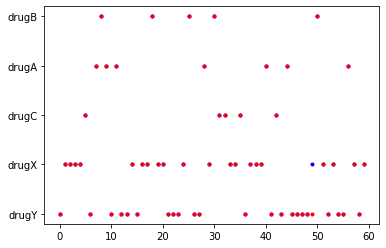

In [49]:
plt.plot(y_test , '.' , color='blue')
plt.plot(y_predict , '.' , color='red')